# 1. install packages

In [1]:
!pip install cyclicpeptide==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 220.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 606.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 806.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 747.5/747.5 kB 1.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 5.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 5.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
  Attempting uninstall: networkx
    Found existing instal

# 2. Create a cyclic peptide by Sequence2Structure

SMILES: C[C@@H]1NC(=O)CNC(=O)[C@@H]2CCCN2C1=O


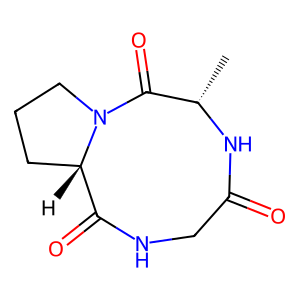

In [3]:
from cyclicpeptide import Sequence2Structure, IOManager
smiles, peptide = Sequence2Structure.seq2stru_essentialAA(sequence='APG', cyclic=True)
print('SMILES:', smiles)
IOManager.plot_smiles(smiles, w=300, h=300, isdisplay=True)

# 3. Structure2Sequence for essential amino acid peptides

In [5]:
from rdkit import Chem
from cyclicpeptide import Structure2Sequence

m = Chem.MolFromSmiles(smiles)
m_renum, seq = Structure2Sequence.mol2seq_for_essentialAA(m)
print('Sequence:', seq)

/opt/conda/lib/python3.11/site-packages/cyclicpeptide/aa_smiles.txt
Sequence: APG


### use Structure2Sequence.transform for any cyclic peptides

In [6]:
from IPython.display import HTML

html = Structure2Sequence.transform(smiles, monomers_path='') # use the default monomer database
# show html report
HTML(html)

# 4. Create a cyclic peptide with non-amino acid component

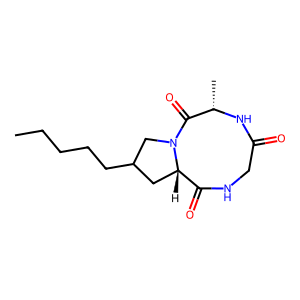

In [7]:
smiles = 'C[C@@H]1NC(=O)CNC(=O)[C@@H]2CC(CCCCC)CN2C1=O'
IOManager.plot_smiles(smiles, w=300, h=300, isdisplay=True)

# 5. Structure2Sequence for cyclic peptide

In [8]:
from IPython.display import HTML

html = Structure2Sequence.transform(smiles, monomers_path='') # use the default monomer database
# show html report
HTML(html)

# 6. Download cyclicpeptide repository from Github and edit monomer database

In [9]:
!git clone https://github.com/dfwlab/cyclicpeptide

Cloning into 'cyclicpeptide'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 195 (delta 70), reused 86 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (195/195), 4.35 MiB | 2.75 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [12]:
import pandas as pd
monomers_path = 'cyclicpeptide/states/monomer.tsv'
monomer_db = pd.read_csv(monomers_path, sep='\t', index_col=0)
print('### Monomer DB Size :', monomer_db.shape)
monomer_db.head(2)

### Monomer DB Size : (546, 13)


,Code,Name,Type,Formula,PubChem,IUPAC,Smiles,Weight,Clusters,Symbol,Source,Essential amino acids,Error
0,Ahad,alpha-amino-hydroxyadipic acid,unknown,C6H11NO5,22326384.0,2-amino-4-hydroxyhexanedioic acid,NC(CC(O)CC(=O)O)C(=O)O,177.15524,"['Aad*', 'Aad*']",NaN,Norine,NaN,NaN
1,Aad,2-Aminoadipic acid,NRPS,C6H11NO4,469.0,2-aminohexanedioic acid,NC(CCCC(=O)O)C(=O)O,161.15584,"['Aad*', 'Aad*']",NaN,Norine,NaN,NaN


In [14]:
monomer_db.loc[monomer_db['Code']=='Pro', :]

,Code,Name,Type,Formula,PubChem,IUPAC,Smiles,Weight,Clusters,Symbol,Source,Essential amino acids,Error
464,Pro,Proline,NRPS,C5H9NO2,145742.0,(2S)-pyrrolidine-2-carboxylic acid,O=C(O)C1CCCN1,115.13046,"['Pro*', 'XPro']",P,Norine,1.0,NaN


In [19]:
new_monomer = monomer_db.loc[monomer_db['Code']=='Pro', :].values[0]
new_monomer[0] = 'Pro**'
new_monomer[1] = 'Proline**'
new_monomer[6] = 'O=C(O)[C@@H]1CC(CCCCC)CN1'
# Other messages ...
new_monomer

array(['Pro**', 'Proline**', 'NRPS', 'C5H9NO2', 145742.0,
       '(2S)-pyrrolidine-2-carboxylic acid', 'O=C(O)[C@@H]1CC(CCCCC)CN1',
       115.13046, "['Pro*', 'XPro']", 'P', 'Norine', 1.0, nan],
      dtype=object)

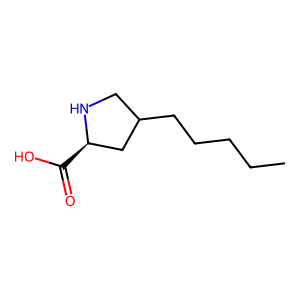

In [20]:
IOManager.plot_smiles(new_monomer[6], w=300, h=300, isdisplay=True)

In [23]:
monomer_db.loc[546, :] = new_monomer
monomer_db.tail(3)

,Code,Name,Type,Formula,PubChem,IUPAC,Smiles,Weight,Clusters,Symbol,Source,Essential amino acids,Error
544,Suc,succinic acid,NaN,C4H6O4,1110.0,butanedioic acid,O=C(O)CCC(=O)O,118.026609,[],NaN,Norine,NaN,NaN
545,Pen,Penicillamine,unknown,C5H11NO2S,92863.0,L-Penicillamine,CC(C)(C(C(=O)O)N)S,149.200000,[],NaN,PubChem,NaN,NaN
546,Pro**,Proline**,NRPS,C5H9NO2,145742.0,(2S)-pyrrolidine-2-carboxylic acid,O=C(O)[C@@H]1CC(CCCCC)CN1,115.130460,"['Pro*', 'XPro']",P,Norine,1.0,NaN


In [24]:
monomer_db.to_csv('monomer_new.tsv', sep='\t')

# Rerun the Structure2Sequence base on new monomer db

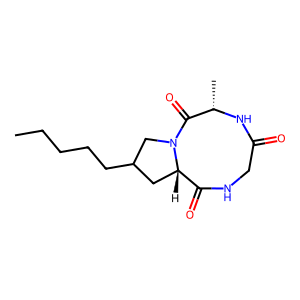

In [25]:
smiles = 'C[C@@H]1NC(=O)CNC(=O)[C@@H]2CC(CCCCC)CN2C1=O'
IOManager.plot_smiles(smiles, w=300, h=300, isdisplay=True)

In [26]:
from IPython.display import HTML

html = Structure2Sequence.transform(smiles, monomers_path='monomer_new.tsv')
# show html report
HTML(html)